In [1]:
using Pkg
Pkg.activate("../..")

  Activating environment at `~/Documents/repos/nanoOpt.jl/Project.toml`


In [2]:
using LazyGrids,SpecialFunctions,Measures,LaTeXStrings,Plots; pyplot()

Plots.PyPlotBackend()

In [3]:
include("../../src/NanoOpt.jl")

hermite (generic function with 1 method)

In [134]:
function Dipoles(mat::MaterialParams,k0::Number,dip::Matrix{Float64},pos::Matrix{Float64})
    [dipole(mat,k0,pos[i,:],dip[i,:]) for i in axes(dip,1)]
end

Dipoles (generic function with 1 method)

In [ ]:
function 

In [360]:
mat1 = material(1.33^2,1.0)
mat2 = material(1.0,1.0)
λ = 632
k0 = 2π/λ
NA=0.8
d = 1.2*λ

dip = [1.0 0.0 0.0;
        1.0 0.0 0.0]

pos = [-1 0 0;
        1 0 0]*d/2

lens=lensimage(mat1,mat2,k0,NA);

In [361]:
#Dipoles = Vector{dipole}(undef,size(dip,1))

Dipols = Dipoles(mat1,k0,dip,pos);


In [362]:
size(Dipols)

(2,)

In [363]:
e1 = farfield(Dipols[1],lens.dir)
e2 = farfield(Dipols[2],lens.dir)
farf = e1.+e2;

In [364]:
x = 2000*collect(range(-1.,1.,length=101))
y =  2000*collect(range(-1.,1.,length=101));
yl = [0.0]

1-element Vector{Float64}:
 0.0

In [365]:
e=efieldC(lens,farf,x,y)./(k0^2/(4π));

In [366]:
ett = real.(sum(conj(e).*e,dims=3)[:,:,1]);

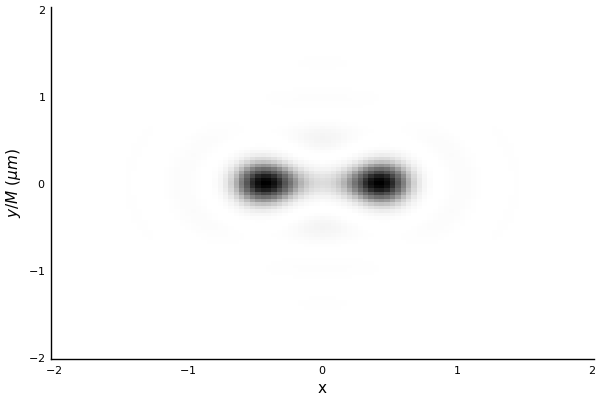

In [367]:
heatmap(x./1000,y./1000,ett',colorbar=false,xlabel="x",ylabel=L"y/M~(\mu m)",c=:Greys)

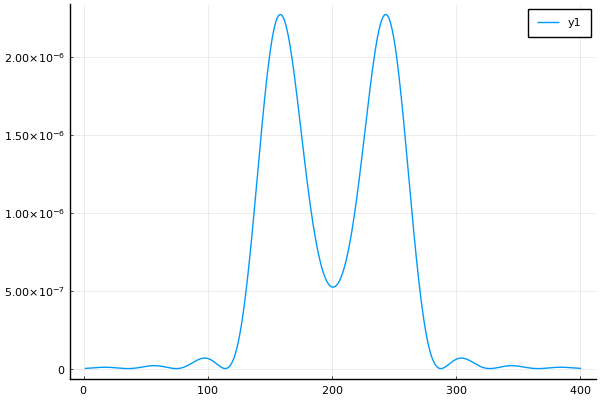

In [368]:
xl = 2000*collect(range(-1.,1.,length=401))
e=efieldC(lens,farf,xl,yl)./(k0^2/(4π))
ett = real.(sum(conj(e).*e,dims=3)[:,:,1]);
plot(ett)

In [369]:
e1

2601×3 Matrix{ComplexF64}:
  7.86531e-6+0.0im         …          0.0+0.0im
  7.86531e-6+0.0im                    0.0+0.0im
  7.86531e-6+0.0im                    0.0+0.0im
  7.86531e-6+0.0im                    0.0+0.0im
  7.86531e-6+0.0im                    0.0+0.0im
  7.86531e-6+0.0im         …          0.0+0.0im
  7.86531e-6+0.0im                    0.0+0.0im
  7.86531e-6+0.0im                    0.0+0.0im
  7.86531e-6+0.0im                    0.0+0.0im
  7.86531e-6+0.0im                    0.0+0.0im
  7.86531e-6+0.0im         …          0.0+0.0im
  7.86531e-6+0.0im                    0.0+0.0im
  7.86531e-6+0.0im                    0.0+0.0im
            ⋮              ⋱  
  6.55802e-6+4.15856e-6im      -5.9809e-7-3.79259e-7im
  4.52767e-6+6.0961e-6im   …  -6.96373e-7-9.37603e-7im
  2.07816e-6+7.04948e-6im     -4.55031e-7-1.54354e-6im
 -3.18609e-7+7.04107e-6im      9.15439e-8-2.02307e-6im
 -2.31079e-6+6.29856e-6im      8.29768e-7-2.26171e-6im
 -3.73119e-6+5.142e-6im        1.61808e-6-2

In [370]:
e2

2601×3 Matrix{ComplexF64}:
  7.86531e-6+0.0im         …          0.0+0.0im
  7.86531e-6+0.0im                    0.0+0.0im
  7.86531e-6+0.0im                    0.0+0.0im
  7.86531e-6+0.0im                    0.0+0.0im
  7.86531e-6+0.0im                    0.0+0.0im
  7.86531e-6+0.0im         …          0.0+0.0im
  7.86531e-6+0.0im                    0.0+0.0im
  7.86531e-6+0.0im                    0.0+0.0im
  7.86531e-6+0.0im                    0.0+0.0im
  7.86531e-6+0.0im                    0.0+0.0im
  7.86531e-6+0.0im         …          0.0+0.0im
  7.86531e-6+0.0im                    0.0+0.0im
  7.86531e-6+0.0im                    0.0+0.0im
            ⋮              ⋱  
  6.55802e-6-4.15856e-6im      -5.9809e-7+3.79259e-7im
  4.52767e-6-6.0961e-6im   …  -6.96373e-7+9.37603e-7im
  2.07816e-6-7.04948e-6im     -4.55031e-7+1.54354e-6im
 -3.18609e-7-7.04107e-6im      9.15439e-8+2.02307e-6im
 -2.31079e-6-6.29856e-6im      8.29768e-7+2.26171e-6im
 -3.73119e-6-5.142e-6im        1.61808e-6+2